<a href="https://colab.research.google.com/github/sandipanpaul21/Machine-Learning-in-Python-Code/blob/master/07_Simple_and_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**

Linear regression is studied as a model for understanding the relationship between input and output numerical variables.

**Linear regression is a linear model**, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

When there is a single input variable (x), the method is referred to as **simple linear regression**. When there are multiple input variables, literature from statistics often refers to the method as **multiple linear regression**

Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called **Ordinary Least Squares**. It is common to therefore refer to a model prepared this way as **Ordinary Least Squares Linear Regression** or just **Least Squares Regression**.

The representation is a linear equation that combines a specific set of **input values (x)** the solution to which is the predicted output for that set of **output values (y)**. As such, both the input values (x) and the output value are numeric.

The linear equation assigns one scale factor to each input value or column, called a **coefficient** and represented by the capital Greek letter **Beta (B)**. One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the **intercept or the bias coefficient.**

For example, in a simple regression problem (a single x and a single y), the form of the model would be:

y = B0 + B1 * x1

In higher dimensions when we have more than one input (x), the line is called a **plane or a hyper-plane**. The representation therefore is the form of the equation and the specific values used for the coefficients (e.g. B0 and B1 in the above example).

It is common to talk about the complexity of a regression model like linear regression. This refers to the **number of coefficients used in the model.**

When a **coefficient becomes zero,** it effectively removes the influence of the input variable on the model and therefore from the prediction made from the model (0 * x = 0). This becomes  relevant if you look at **regularization methods** that change the learning algorithm to reduce the complexity of regression models by putting pressure on the absolute size of the coefficients, driving some to zero.

**Simple Linear Regression**

With simple linear regression when we have a *single input*, we can use statistics to estimate the coefficients

**Ordinary Least Squares**
  - When we have *more than one input* we can use Ordinary Least Squares to estimate the values of the coefficients.
  - The *Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals.* This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

**Regularization**
  - There are extensions of the training of the linear model called regularization methods. 
  - These seek to *both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).*
  - Two popular examples of regularization procedures for linear regression are:
    1. **Lasso Regression:** where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
    2. **Ridge Regression:** where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
  - *These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.*


**Data Preparation for Linear Regression Model**
1. **Linear Assumption.** 
  - Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. 
  - This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
2. **Remove Noise.**
  - Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. 
  - This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
3. **Remove Collinearity.** 
  - Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
4. **Gaussian Distributions.** 
- Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. 
- You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
5. **Rescale Inputs:** 
  - Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

**Assumptions of Linear Regression**

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions:
1. Linear relationship
2. Multivariate normality
3. No or little multicollinearity
4. No auto-correlation
5. Homoscedasticity

A note about sample size.  In Linear regression the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.

In [1]:
# Libraries 
 
from sklearn import datasets 
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Boston Dataset for Regression
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["HOUSEPRICE"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Dataset overall Information
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  HOUSEPRICE  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Let set the BASE MODEL on which we will improve

# Assigning Independent and Dependent variables
dependent_variable = boston_pd[['HOUSEPRICE']]
print("DEPENDENT VARIABLE : ",dependent_variable.columns)
print("\n")
independent_variables = boston_pd[boston_pd.columns[0:12]]
print("INDEPENDENT VARIABLES : ")
print(independent_variables.columns)

DEPENDENT VARIABLE :  Index(['HOUSEPRICE'], dtype='object')


INDEPENDENT VARIABLES : 
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B'],
      dtype='object')


In [5]:
# Add constant to the dataframe
# In Statsmodel library, intercept is not considered. So we need to add Manually
independent_variables = sm.add_constant(independent_variables)
print("After Adding constant, Independent Variable names are")
print(independent_variables.columns)

After Adding constant, Independent Variable names are
Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B'],
      dtype='object')


In [6]:
# Base Model

import statsmodels.api as sm
from statsmodels.api import OLS
base_model = OLS(dependent_variable, independent_variables).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HOUSEPRICE   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     89.01
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          4.90e-115
Time:                        06:55:54   Log-Likelihood:                -1548.6
No. Observations:                 506   AIC:                             3123.
Df Residuals:                     493   BIC:                             3178.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6526      5.368      3.848      0.000      10.106      31.199
CRIM          -0.1599      0.036     -4.467      0.000      -0.230      -0.090
ZN             0.0389      0.015      2.573      0.010       0.009       0.069
INDUS         -0.0279      0.068     -0.413      0.680      -0.161       0.105
CHAS           3.2166      0.948      3.393      0.001       1.354       5.079
NOX          -20.4846      4.201     -4.877      0.000     -28.738     -12.231
RM             6.1231      0.389     15.731      0.000       5.358       6.888
AGE           -0.0459      0.014     -3.356      0.001      -0.073      -0.019
DIS           -1.5549      0.220     -7.077      0.000      -1.987      -1.123
RAD            0.2816      0.073      3.852      0.000       0.138       0.425
TAX           -0.0117      0.004     -2.832      0.005      -0.020      -0.004
PTRATIO       -1.0142      0.144     -7.040      0.000      -1.297      -0.731
B              0.0136      0.003      4.657      0.000       0.008       0.019
==============================================================================
Omnibus:                      267.269   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2542.250
Skew:                           2.108   Prob(JB):                         0.00
Kurtosis:                      13.139   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**OUTPUT EXPLAINATION**

**Omnibus/Prob(Omnibus)**
- **Prob(Omnibus)** is a statistical test measuring the *probability the residuals are normally distributed. 1 would indicate perfectly normal distribution.* 
- **Omnibus** describes the normalcy of the *distribution of our residuals* using skew and kurtosis as measurements. A *0 would indicate perfect normalcy.* 
- The **Prob(Omnibus)** indicates the probability that the residuals are normally distributed. We hope to see something close to 1 here. 
- In this case Omnibus = 267 (way higher than 1) and Prob(Omnibus) = 0 which (normally = 1)is low. So the data is not normal, not ideal. 

**Skew** 
- Skew is a measurement of symmetry in our data, with 0 being perfect symmetry. 
- We want to see something close to zero, indicating the residual distribution is normal. 
- Note that this value also drives the Omnibus
- In this case, Skewness = 2.1, way higher than 0 so error/residual is skewwed

**Kurtosis** 
- Kurtosis measures the *peakiness of our data.*
- *Kurtosis of the normal distribution is 3.0*
- In this case, Kurtosis = 13.14 which is way too higher

**Durbin-Watson**
- Durbin-Watson is a *measurement of homoscedasticity, or an even distribution of errors throughout our data.* 
- Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. *Ideal homoscedasticity will lie between 1 and 2.* 
- In this case, Durbin-Watson = 0.78 is close, but within limits.

**Jarque-Bera (JB)/Prob(JB) -** 
- Jarque-Bera (JB) and Prob(JB) are *alternate methods of measuring the same value as Omnibus and Prob(Omnibus)* using skewness and kurtosis. We use these values to confirm each other
- It is like the Omnibus test in that it tests both skew and kurtosis. 
- It is also performed for the distribution analysis of the regression errors.
- A *large value of JB test indicates that the errors are not normally distributed.*
- In this case, JB = 2542 which is way too higher so error are not normally distributed

**Condition Number -**
- Condition number is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. 
- *Multicollinearity is strongly implied by a high condition number.* 
- Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.
- When we have multicollinearity, we can expect much higher fluctuations to small changes in the data hence, we hope to see a relatively small number, something below 30. 
- In this case, Condition Number = well above 30, so multicollinearity present

**R Square and Adjusted R Square -**
- R Squared is the measurement of how much of the independent variable is explained by changed in our dependent variable
- In percentage terms, 0.68 would mean our model explains 68% of the dependent variable
- Adjusted R-squared is important for analyzing multiple dependent variables’ efficacy on the model. 
- R-squared value will never go down with additional variables, only equal or higher. 
- Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. 
- The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.
- Both measures model performance and Possible values range from 0.0 to 1.0. 
- Higher the Adjusted R Square, better is the model

**F Statistics and Prob(F Statistics) -**
- This test for overall significance has the following two hypothesis:
- **Null hypothesis :** Model with no independent variables fits the data as well as your model.
- **Alternative hypothesis :** Model fits the data better than the intercept-only model.
- In this case, P(F-Statistics) = less than 0.05 suggests Independent variables are important

**P Value -** 
- If the p-value for a variable is less than your significance level (0.05), sample data provide enough evidence to reject the null hypothesis for the entire population.
- Null hypothesis that the variable has no correlation with the dependent variable. 
- If No correlation, no association between the changes in the independent & dependent variable.
- In this case, Remove all variables with P values greater than 0.05
- P>|t| uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. 
- The p value of 0.68 for Wealth is saying there is a 68% chance the Indus variable has no affect on the dependent variable, Houseprice and our results are produced by chance. 
- A common alpha is 0.05, which few of our variables pass in this instance.

**NOTE :** Log-Likelihood, AIC and BIC are for LOGISTIC REGRESSION MODEL

In [ ]:
# Model Properties

# Normality of the residuals
# Jarque-Bera test:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(base_model.resid)
base_model_properties_1 = lzip(name, test)
print("BASE MODEL PARAMETERS")
print("\n")
print("Normality of the residuals")
print("Jarque-Bera test : ")
print("JB, ideal is close to 0")
print("Probability(JB), less than 0.05")
print("Skewness, ideal is -1 to 1")
print("Kurtosis, ideal value is 3")
print(pd.DataFrame(base_model_properties_1,columns = ['Test','Values']).round(2))

# Omni test:
print("\n")
print("Normality of the residuals (also)")
print("Omni Test : ")
print("Omni, ideal is close to 0")
print("Probability(Omni), less than 0.05")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(base_model.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))

# Multicollinearity
print("\n")
print("Multicollinearity")
print("Ideal Condition Number will be less than 30")
print("Condition number:",np.linalg.cond(base_model.model.exog).round(2))

# Adjusted R Square
print("\n")
print("Model Performance")
print("Adjusted R Square, ideal is close to 1")
print("Adjusted R Square : ",base_model.rsquared_adj.round(2))

# F Statistics
print("\n")
print("Significance of Independent Variables")
print("Probability(F Stat), less than 0.05 suggests independent variables are important")
print("F Statistics : ",base_model.fvalue.round(2))
print("Probability of F Statistics : ",base_model.f_pvalue.round(2))

# Durbin Watson Test
print("\n")
print("Homoscedasticity of Error")
print("Durbin Watson, ideal is between 1 to 2")
print("Durbin Watson Value : 0.78")

BASE MODEL PARAMETERS


Normality of the residuals
Jarque-Bera test : 
JB, ideal is close to 0
Probability(JB), less than 0.05
Skewness, ideal is -1 to 1
Kurtosis, ideal value is 3
                   Test   Values
0           Jarque-Bera  2542.25
1  Chi^2 two-tail prob.     0.00
2                  Skew     2.11
3              Kurtosis    13.14


Normality of the residuals (also)
Omni Test : 
Omni, ideal is close to 0
Probability(Omni), less than 0.05
                   Test  Values
0                 Chi^2  267.27
1  Two-tail probability    0.00


Multicollinearity
Ideal Condition Number will be less than 30
Condition number: 14793.16


Model Performance
Adjusted R Square, ideal is close to 1
Adjusted R Square :  0.68


Significance of Independent Variables
Probability(F Stat), less than 0.05 suggests independent variables are important
F Statistics :  89.01
Probability of F Statistics :  0.0


Homoscedasticity of Error
Durbin Watson, ideal is between 1 to 2
Durbin Watson Value : 0.78


In [ ]:
# Let test the Base Model

# Dividing Data into training and test set
from sklearn.model_selection import train_test_split 
data_train, data_test, house_price_train, house_price_test = train_test_split(independent_variables,dependent_variable,train_size = 0.7,random_state = 21)
print("Training Data Shape :", data_train.shape)
print("Training House Price Shape :", house_price_train.shape)
print("Test Data Shape :",data_test.shape)
print("Test House Price Shape :",house_price_test.shape)

Training Data Shape : (354, 13)
Training House Price Shape : (354, 1)
Test Data Shape : (152, 13)
Test House Price Shape : (152, 1)


In [ ]:
# Base Model
Model_1 = OLS(house_price_train,data_train).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HOUSEPRICE   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     63.54
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           2.32e-79
Time:                        13:35:59   Log-Likelihood:                -1069.2
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     341   BIC:                             2215.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7285      6.186      4.159      0.000      13.562      37.895
CRIM          -0.2415      0.055     -4.364      0.000      -0.350      -0.133
ZN             0.0495      0.018      2.676      0.008       0.013       0.086
INDUS         -0.0334      0.075     -0.442      0.658      -0.182       0.115
CHAS           2.6172      1.052      2.488      0.013       0.548       4.686
NOX          -20.1834      4.897     -4.121      0.000     -29.816     -10.550
RM             5.3255      0.443     12.028      0.000       4.455       6.196
AGE           -0.0414      0.016     -2.615      0.009      -0.073      -0.010
DIS           -1.5677      0.252     -6.222      0.000      -2.063      -1.072
RAD            0.3606      0.085      4.229      0.000       0.193       0.528
TAX           -0.0131      0.005     -2.837      0.005      -0.022      -0.004
PTRATIO       -1.1124      0.173     -6.418      0.000      -1.453      -0.772
B              0.0175      0.004      4.936      0.000       0.011       0.025
==============================================================================
Omnibus:                      186.735   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1626.044
Skew:                           2.039   Prob(JB):                         0.00
Kurtosis:                      12.675   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Model Properties

# Normality of the residuals
# Jarque-Bera test:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(Model_1.resid)
model_properties_1 = lzip(name, test)
print("MODEL 1 PARAMETERS")
print("\n")
print("Normality of the residuals")
print("Jarque-Bera test : ")
print("JB, ideal is close to 0")
print("Probability(JB), less than 0.05")
print("Skewness, ideal is -1 to 1")
print("Kurtosis, ideal value is 3")
print(pd.DataFrame(model_properties_1,columns = ['Test','Values']).round(2))

# Omni test:
print("Omni Test : ")
print("Omni, ideal is close to 0")
print("Probability(Omni), less than 0.05")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(Model_1.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))

# Multicollinearity
print("\n")
print("Multicollinearity")
print("Ideal Condition Number will be less than 30")
print("Condition number:",np.linalg.cond(Model_1.model.exog).round(2))

# Adjusted R Square
print("\n")
print("Model Performance")
print("Adjusted R Square, ideal is close to 1")
print("Adjusted R Square : ",Model_1.rsquared_adj.round(2))

# F Statistics
print("\n")
print("Significance of Independent Variables")
print("Probability(F Stat), less than 0.05 suggests independent variables are important")
print("F Statistics : ",base_model.fvalue.round(2))
print("Probability of F Statistics : ",Model_1.f_pvalue.round(2))

# Durbin Watson Test
print("\n")
print("Homoscedasticity of Error")
print("Durbin Watson, ideal is between 1 to 2")
print("Durbin Watson Value : 1.99")

MODEL 1 PARAMETERS


Normality of the residuals
Jarque-Bera test : 
JB, ideal is close to 0
Probability(JB), less than 0.05
Skewness, ideal is -1 to 1
Kurtosis, ideal value is 3
                   Test   Values
0           Jarque-Bera  1626.04
1  Chi^2 two-tail prob.     0.00
2                  Skew     2.04
3              Kurtosis    12.68
Omni Test : 
Omni, ideal is close to 0
Probability(Omni), less than 0.05
                   Test  Values
0                 Chi^2  186.74
1  Two-tail probability    0.00


Multicollinearity
Ideal Condition Number will be less than 30
Condition number: 14949.83


Model Performance
Adjusted R Square, ideal is close to 1
Adjusted R Square :  0.68


Significance of Independent Variables
Probability(F Stat), less than 0.05 suggests independent variables are important
F Statistics :  89.01
Probability of F Statistics :  0.0


Homoscedasticity of Error
Durbin Watson, ideal is between 1 to 2
Durbin Watson Value : 1.99


In [ ]:
# Base Model Test and Metrics

from sklearn import metrics
Prediction_1 = Model_1.predict(data_test)
print("Mean Absolute Error :",metrics.mean_absolute_error(house_price_test,Prediction_1).round(2))
print("Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_1).round(2))
print("Root Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_1).round(2))

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print("Mean Absolute Percentage Error :",mape(house_price_test,Prediction_1).round(2))

# MAE is Absolute difference between the Model Predictions & True(Actual) values
# MSE is Square difference between Model Predictions & True values
# MSE affected by Outliers, because we Square the distance
# RMSE, square root(MSE) therefore cancelling the affect the square 
# MAE value can range from 0 to infinity, difficult to interpret
# MAPE is equivalent to MAE but provide the error in a percentage(0-100)

# MAPE = 52,average difference between predicted & actual is 52% which is very high

Mean Absolute Error : 4.01
Mean Squared Error : 33.66
Root Mean Squared Error : 33.66
Mean Absolute Percentage Error : 52.39


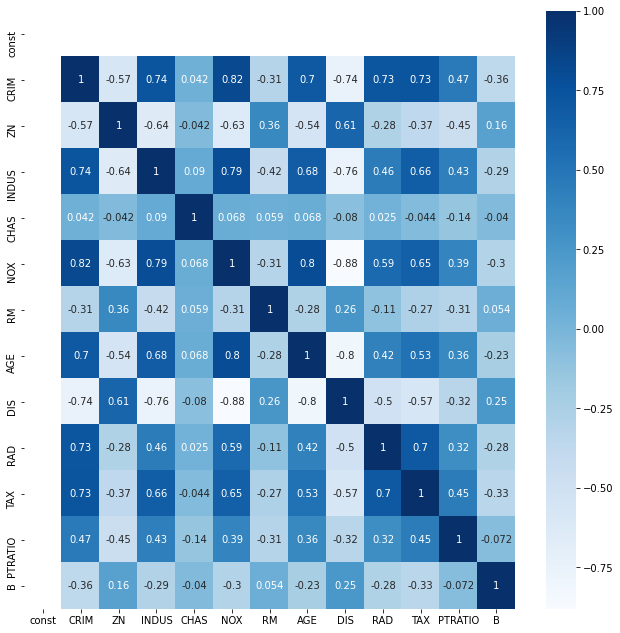

In [ ]:
# Model 2, first Data Cleaning

# Correlation 
# Increasing the size of the plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,11)) # Sample figsize in inches, change the number accordingly
sns.heatmap(independent_variables.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# Inference : 
# Lots of High Correlation Values

In [ ]:
# Filtering Highly Positive or Negative Correlated Values

# Create correlation matrix
corr_matrix = independent_variables.corr().round(2)
corr_matrix

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM,NaN,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39
ZN,NaN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18
INDUS,NaN,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36
CHAS,NaN,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05
NOX,NaN,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38
RM,NaN,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13
AGE,NaN,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27
DIS,NaN,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29
RAD,NaN,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44


In [ ]:
# Find index of feature columns with correlation greater than 0.75
Pos_corr_var=np.where(corr_matrix > 0.75)
Pos_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*Pos_corr_var) if x!=y and x<y]
print("Highly Positive Related (> 0.75) : ")
print(Pos_corr_var)

# Find index of feature columns with correlation less than - 0.75
Neg_corr_var=np.where(corr_matrix < -0.75)
Neg_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*Neg_corr_var) if x!=y and x<y]
print("Highly Negatively Related (< - 0.75) : ")
print(Neg_corr_var)

# Inference : 
# Remove 'INDUS' / 'NOX', 'RAD'/'TAX , 'NOX'/'DIS'
# Removing NOX
independent_variables = independent_variables.drop(['NOX'], axis = 1)

# Now out of 'RAD' & 'TAX' which one to remove ? VIF

Highly Positive Related (> 0.75) : 
[('INDUS', 'NOX'), ('RAD', 'TAX')]
Highly Negatively Related (< - 0.75) : 
[('NOX', 'DIS')]


In [ ]:
# Function for VIF
 
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)
 
print(pd.DataFrame(calc_vif(independent_variables).sort_values("VIF")))
 
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 20 indicates high multicollinearity between this independent variable and the others
 
# Inference : 
# Remove 'RM','TAX' and 'PTRATIO'
# independent_variables = independent_variables.drop(['RM', 'TAX', 'PTRATIO'], axis = 1)

   variables         VIF
4       CHAS    1.069265
11         B    1.306190
5         RM    1.347445
10   PTRATIO    1.602691
1       CRIM    1.746058
2         ZN    2.289884
6        AGE    2.480534
7        DIS    3.640058
3      INDUS    3.677764
8        RAD    7.317727
9        TAX    8.957485
0      const  344.083623


Quantile Distribution
           CRIM
0.00   0.006320
0.10   0.038195
0.20   0.064170
0.30   0.099245
0.40   0.150380
0.50   0.256510
0.60   0.550070
0.70   1.728440
0.80   5.581070
0.90  10.753000
0.95  15.789150
1.00  88.976200


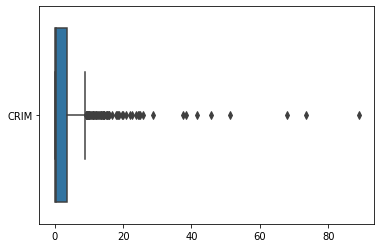

In [ ]:
# Outlier in the data (Column Wise Checking)

# CRIM Column
print("Quantile Distribution")
print(pd.DataFrame(independent_variables['CRIM'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['CRIM'])

# Inference : 
# Capping to 95% Datapoints
independent_variables['CRIM'] = np.where(independent_variables['CRIM'].round(1) > 15.0, 15.0, independent_variables['CRIM'])

Quantile Distribution
         ZN
0.00    0.0
0.10    0.0
0.20    0.0
0.30    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.70    0.0
0.80   20.0
0.90   42.5
0.95   80.0
1.00  100.0


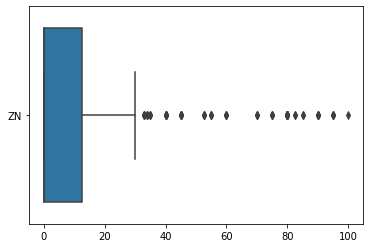

In [ ]:
# ZN Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['ZN'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['ZN'])

# Inference : 
# Most Values (70%) data points are zero. So lets not do any capping !!

Quantile Distribution
      INDUS
0.00   0.46
0.10   2.91
0.20   4.39
0.30   5.96
0.40   7.38
0.50   9.69
0.60  12.83
0.70  18.10
0.80  18.10
0.90  19.58
0.95  21.89
1.00  27.74


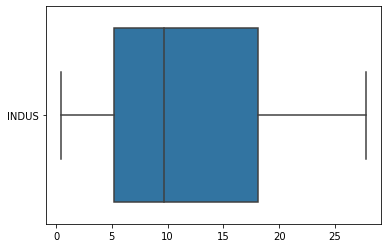

In [ ]:
# CRIM Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['INDUS'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['INDUS'])

# Inference : NO OUTLIERS

Quantile Distribution
      CHAS
0.00   0.0
0.10   0.0
0.20   0.0
0.30   0.0
0.40   0.0
0.50   0.0
0.60   0.0
0.70   0.0
0.80   0.0
0.90   0.0
0.95   1.0
1.00   1.0


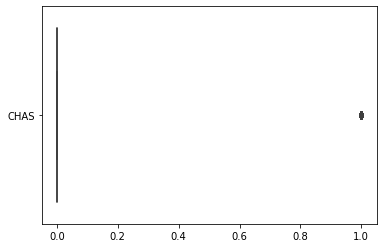

In [ ]:
# CHAS Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['CHAS'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['CHAS'])

# Inference : 
# 90% of Data is 0. So lets drop the variable
independent_variables = independent_variables.drop(['CHAS'], axis = 1)

Quantile Distribution
         AGE
0.00    2.90
0.10   26.95
0.20   37.80
0.30   52.40
0.40   65.40
0.50   77.50
0.60   85.90
0.70   91.80
0.80   95.60
0.90   98.80
0.95  100.00
1.00  100.00


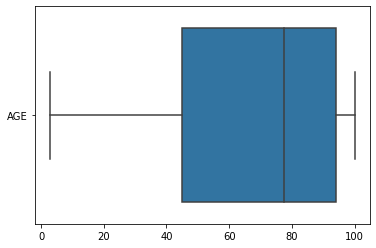

In [ ]:
# AGE Column 

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['AGE'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['AGE'])

# Inference : NO OUTLIERS

Quantile Distribution
           DIS
0.00   1.12960
0.10   1.62830
0.20   1.95120
0.30   2.25965
0.40   2.64030
0.50   3.20745
0.60   3.87500
0.70   4.54040
0.80   5.61500
0.90   6.81660
0.95   7.82780
1.00  12.12650


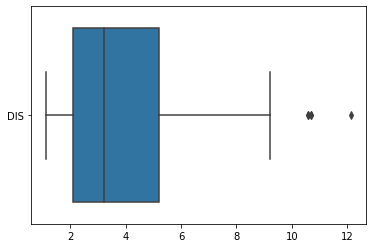

In [ ]:
# DIS Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['DIS'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['DIS'])

# Inference : Capping to 95% Datapoints
independent_variables['DIS'] = np.where(independent_variables['DIS'].round(1) > 7.0, 7.0, independent_variables['DIS'])

Quantile Distribution
       RAD
0.00   1.0
0.10   3.0
0.20   4.0
0.30   4.0
0.40   5.0
0.50   5.0
0.60   5.0
0.70   8.0
0.80  24.0
0.90  24.0
0.95  24.0
1.00  24.0


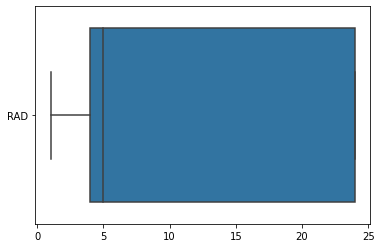

In [ ]:
# RAD Column 

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['RAD'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['RAD'])

# Inference : NO OUTLIERS

Quantile Distribution
            B
0.00    0.320
0.10  290.270
0.20  364.310
0.30  378.665
0.40  387.970
0.50  391.440
0.60  393.530
0.70  395.465
0.80  396.900
0.90  396.900
0.95  396.900
1.00  396.900


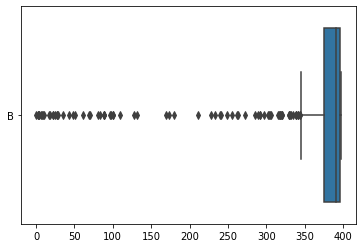

In [ ]:
# B Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['B'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['B'])

# Inference : Capping to first 10% Datapoints
independent_variables['B'] = np.where(independent_variables['B'].round(1) < 290.0, 290.0, independent_variables['B'])

In [ ]:
# Skewness in the Data

# If Skewness = 0, data is perfectly symmetrical
# If Skewness is less than -1 or greater +1, distribution is highly skewed
# If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
# If Skewness is between -0.5 and 0.5 then it is approximately symmetric  

pd.DataFrame(independent_variables.skew().round(2),columns = ["Skewness"])

# Inference : Positive Skew - 'CRIM','ZN' & Negative Skew - 'B'

,Skewness
const,0.00
CRIM,1.71
ZN,2.23
INDUS,0.30
RM,0.40
AGE,-0.60
DIS,0.55
RAD,1.00
TAX,0.67
PTRATIO,-0.80


In [ ]:
# Remove Skewness one by one (Column Wise)

# CRIM Variable
# Log Transformation
CRIM_Log = np.log(independent_variables['CRIM'])

# Square Root Transformation
CRIM_sqrt = np.sqrt(independent_variables['CRIM'])

# Cube Root Transformation
CRIM_cbrt = np.cbrt(independent_variables['CRIM'])

# Box Cox Transformation
from scipy import stats
CRIM_BoxCox = stats.boxcox(independent_variables['CRIM'])[0]
Variable = pd.Series(CRIM_BoxCox)

print("Comparing all Skewness values")
print(pd.DataFrame([independent_variables['CRIM'].skew(),CRIM_Log.skew(),CRIM_sqrt.skew(),CRIM_cbrt.skew(),Variable.skew()],
             index=['Normal','Log','Square Root','Cube Root','Box Cox'],
             columns = ["Skewness"]))

# Inference : Best transformations is Log Transformation (Near to 0)

independent_variables['CRIM_Log'] = CRIM_Log

Comparing all Skewness values
             Skewness
Normal       1.705324
Log          0.321681
Square Root  1.168043
Cube Root    0.935891
Box Cox      0.083939


In [ ]:
# ZN Variable

# Log Transformation
ZN_Log = np.log(independent_variables['ZN'])

# Square Root Transformation
ZN_sqrt = np.sqrt(independent_variables['ZN'])

# Cube Root Transformation
ZN_cbrt = np.cbrt(independent_variables['ZN'])

print("Comparing all Skewness values")
print(pd.DataFrame([independent_variables['ZN'].skew(),ZN_Log.skew(),ZN_sqrt.skew(),ZN_cbrt.skew()],
             index=['Normal','Log','Square Root','Cube Root'],
             columns = ["Skewness"]))

# Inference : Best transformations is Cube Transformation (Near to 0)

independent_variables['ZN_Cbrt'] = ZN_cbrt

Comparing all Skewness values
             Skewness
Normal       2.225666
Log               NaN
Square Root  1.476293
Cube Root    1.262563


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# B Variable

# Log Transformation
B_Log = np.log(independent_variables['B'])

# Square Root Transformation
B_sqrt = np.sqrt(independent_variables['B'])

# Cube Root Transformation
B_cbrt = np.cbrt(independent_variables['B'])

# Box Cox Transformation
from scipy import stats
B_BoxCox = stats.boxcox(independent_variables['B'])[0]
Variable = pd.Series(B_BoxCox)

print("Comparing all Skewness values")
print(pd.DataFrame([independent_variables['B'].skew(),B_Log.skew(),B_sqrt.skew(),B_cbrt.skew(),Variable.skew()],
             index=['Normal','Log','Square Root','Cube Root','Box Cox'],
             columns = ["Skewness"]))

# Inference : Best transformations is Box Cox Transformation (Approx to zero)
# But avoiding Box Cox because it give values e raise to, second best is Square Root Transformation
independent_variables['B_Sqrt'] = B_sqrt

Comparing all Skewness values
             Skewness
Normal      -1.760681
Log         -1.837693
Square Root -1.799513
Cube Root   -1.812319
Box Cox     -0.867610


In [ ]:
# Removing variables (raw variables) which are transformed and keep one set also (no removing)
independent_variables_v2 = independent_variables

# Removing variables
independent_variables = independent_variables.drop(['CRIM', 'ZN', 'B'], axis = 1)

# Round to 2 decimal point
independent_variables = independent_variables.round(2)
independent_variables.head()

,const,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,CRIM_Log,ZN_Cbrt,B_Sqrt
0,1.0,2.31,6.58,65.2,4.09,1.0,296.0,15.3,-5.06,2.62,19.92
1,1.0,7.07,6.42,78.9,4.97,2.0,242.0,17.8,-3.60,0.00,19.92
2,1.0,7.07,7.18,61.1,4.97,2.0,242.0,17.8,-3.60,0.00,19.82
3,1.0,2.18,7.00,45.8,6.06,3.0,222.0,18.7,-3.43,0.00,19.87
4,1.0,2.18,7.15,54.2,6.06,3.0,222.0,18.7,-2.67,0.00,19.92


In [ ]:
# Now Train the model

# Splitting Data into 70:30
data_train, data_test, house_price_train, house_price_test = train_test_split(independent_variables,dependent_variable,train_size = 0.7,random_state = 21)

# Fitting the model
Model_2 = OLS(house_price_train,data_train).fit()
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HOUSEPRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     60.65
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           9.29e-70
Time:                        13:36:02   Log-Likelihood:                -1096.8
No. Observations:                 354   AIC:                             2216.
Df Residuals:                     343   BIC:                             2258.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1318      8.474     -0.842      0.401     -23.799       9.535
INDUS         -0.0841      0.080     -1.058      0.291      -0.240       0.072
RM             5.9865      0.461     12.981      0.000       5.079       6.894
AGE           -0.0709      0.017     -4.126      0.000      -0.105      -0.037
DIS           -1.5377      0.322     -4.768      0.000      -2.172      -0.903
RAD            0.2449      0.105      2.343      0.020       0.039       0.450
TAX           -0.0149      0.005     -3.054      0.002      -0.025      -0.005
PTRATIO       -1.0319      0.183     -5.641      0.000      -1.392      -0.672
CRIM_Log      -0.4998      0.381     -1.313      0.190      -1.248       0.249
ZN_Cbrt        0.2892      0.308      0.940      0.348      -0.316       0.895
B_Sqrt         1.3286      0.372      3.572      0.000       0.597       2.060
==============================================================================
Omnibus:                      202.916   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2161.246
Skew:                           2.191   Prob(JB):                         0.00
Kurtosis:                      14.283   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Model Properties

# Normality of the residuals
# Jarque-Bera test:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(Model_2.resid)
base_model_properties_2 = lzip(name, test)
print("MODEL 2 PARAMETERS")
print("\n")
print("Normality of the residuals")
print("Jarque-Bera test : ")
print("JB, ideal is close to 0")
print("Probability(JB), less than 0.05")
print("Skewness, ideal is -1 to 1")
print("Kurtosis, ideal value is 3")
print(pd.DataFrame(base_model_properties_2,columns = ['Test','Values']).round(2))

# Omni test:
print("Omni Test : ")
print("Omni, ideal is close to 0")
print("Probability(Omni), less than 0.05")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(Model_2.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))

# Multicollinearity
print("\n")
print("Multicollinearity")
print("Ideal Condition Number will be less than 30")
print("Condition number:",np.linalg.cond(Model_2.model.exog).round(2))

# Adjusted R Square
print("\n")
print("Model Performance")
print("Adjusted R Square, ideal is close to 1")
print("Adjusted R Square : ",Model_2.rsquared_adj.round(2))

# F Statistics
print("\n")
print("Significance of Independent Variables")
print("Probability(F Stat), less than 0.05 suggests independent variables are important")
print("F Statistics : ",Model_2.fvalue.round(2))
print("Probability of F Statistics : ",Model_2.f_pvalue.round(2))

# Durbin Watson Test
print("\n")
print("Homoscedasticity of Error")
print("Durbin Watson, ideal is between 1 to 2")
print("Durbin Watson Value : 2.1")

MODEL 2 PARAMETERS


Normality of the residuals
Jarque-Bera test : 
JB, ideal is close to 0
Probability(JB), less than 0.05
Skewness, ideal is -1 to 1
Kurtosis, ideal value is 3
                   Test   Values
0           Jarque-Bera  2161.25
1  Chi^2 two-tail prob.     0.00
2                  Skew     2.19
3              Kurtosis    14.28
Omni Test : 
Omni, ideal is close to 0
Probability(Omni), less than 0.05
                   Test  Values
0                 Chi^2  202.92
1  Two-tail probability    0.00


Multicollinearity
Ideal Condition Number will be less than 30
Condition number: 13155.98


Model Performance
Adjusted R Square, ideal is close to 1
Adjusted R Square :  0.63


Significance of Independent Variables
Probability(F Stat), less than 0.05 suggests independent variables are important
F Statistics :  60.65
Probability of F Statistics :  0.0


Homoscedasticity of Error
Durbin Watson, ideal is between 1 to 2
Durbin Watson Value : 2.1


In [ ]:
# Prediction of Model 2 

Prediction_2 = Model_2.predict(data_test)
print("Mean Absolute Error :",metrics.mean_absolute_error(house_price_test,Prediction_2).round(2))
print("Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_2).round(2))
print("Root Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_2).round(2))
print("Mean Absolute Percentage Error :",mape(house_price_test,Prediction_2).round(2))

# Inference : 
# Model 1 MAPE = 49.7% decreased to 48.3% in Model 2. Good Progress !!

Mean Absolute Error : 3.9
Mean Squared Error : 34.54
Root Mean Squared Error : 34.54
Mean Absolute Percentage Error : 50.5


In [ ]:
# Model 3

# Now lets drop variable based on P Values
independent_variables = independent_variables.drop(['RAD', 'CRIM_Log'], axis = 1)

# Splitting Data into 70:30
data_train, data_test, house_price_train, house_price_test = train_test_split(independent_variables,dependent_variable,train_size = 0.7, random_state = 21)

# Fitting the model
Model_3 = OLS(house_price_train,data_train).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HOUSEPRICE   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     74.38
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           1.83e-70
Time:                        13:36:02   Log-Likelihood:                -1099.6
No. Observations:                 354   AIC:                             2217.
Df Residuals:                     345   BIC:                             2252.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3930      8.273     -1.377      0.169     -27.664       4.878
INDUS         -0.1324      0.077     -1.715      0.087      -0.284       0.019
RM             6.1019      0.461     13.241      0.000       5.196       7.008
AGE           -0.0769      0.017     -4.602      0.000      -0.110      -0.044
DIS           -1.5708      0.318     -4.943      0.000      -2.196      -0.946
TAX           -0.0068      0.003     -2.518      0.012      -0.012      -0.001
PTRATIO       -0.9154      0.177     -5.184      0.000      -1.263      -0.568
ZN_Cbrt        0.4088      0.302      1.356      0.176      -0.184       1.002
B_Sqrt         1.4215      0.360      3.947      0.000       0.713       2.130
==============================================================================
Omnibus:                      210.014   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2347.177
Skew:                           2.277   Prob(JB):                         0.00
Kurtosis:                      14.764   Cond. No.                     1.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Model 3 Properties

# Normality of the residuals
# Jarque-Bera test:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(Model_3.resid)
base_model_properties_3 = lzip(name, test)
print("MODEL 3 PARAMETERS")
print("\n")
print("Normality of the residuals")
print("Jarque-Bera test : ")
print("JB, ideal is close to 0")
print("Probability(JB), less than 0.05")
print("Skewness, ideal is -1 to 1")
print("Kurtosis, ideal value is 3")
print(pd.DataFrame(base_model_properties_3,columns = ['Test','Values']).round(2))

# Omni test:
print("Omni Test : ")
print("Omni, ideal is close to 0")
print("Probability(Omni), less than 0.05")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(Model_3.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))

# Multicollinearity
print("\n")
print("Multicollinearity")
print("Ideal Condition Number will be less than 30")
print("Condition number:",np.linalg.cond(Model_3.model.exog).round(2))

# Adjusted R Square
print("\n")
print("Model Performance")
print("Adjusted R Square, ideal is close to 1")
print("Adjusted R Square : ",Model_3.rsquared_adj.round(2))

# F Statistics
print("\n")
print("Significance of Independent Variables")
print("Probability(F Stat), less than 0.05 suggests independent variables are important")
print("F Statistics : ",base_model.fvalue.round(2))
print("Probability of F Statistics : ",Model_3.f_pvalue.round(2))

# Durbin Watson Test
print("\n")
print("Homoscedasticity of Error")
print("Durbin Watson, ideal is between 1 to 2")
print("Durbin Watson Value : 2.07")

MODEL 3 PARAMETERS


Normality of the residuals
Jarque-Bera test : 
JB, ideal is close to 0
Probability(JB), less than 0.05
Skewness, ideal is -1 to 1
Kurtosis, ideal value is 3
                   Test   Values
0           Jarque-Bera  2347.18
1  Chi^2 two-tail prob.     0.00
2                  Skew     2.28
3              Kurtosis    14.76
Omni Test : 
Omni, ideal is close to 0
Probability(Omni), less than 0.05
                   Test  Values
0                 Chi^2  210.01
1  Two-tail probability    0.00


Multicollinearity
Ideal Condition Number will be less than 30
Condition number: 12774.1


Model Performance
Adjusted R Square, ideal is close to 1
Adjusted R Square :  0.62


Significance of Independent Variables
Probability(F Stat), less than 0.05 suggests independent variables are important
F Statistics :  89.01
Probability of F Statistics :  0.0


Homoscedasticity of Error
Durbin Watson, ideal is between 1 to 2
Durbin Watson Value : 2.07


In [ ]:
# Prediction of Model 3

Prediction_3 = Model_3.predict(data_test)
print("Mean Absolute Error :",metrics.mean_absolute_error(house_price_test,Prediction_3).round(2))
print("Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_3).round(2))
print("Root Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_3).round(2))
print("Mean Absolute Percentage Error :",mape(house_price_test,Prediction_3).round(2))

# Inference : 
# Model 1 MAPE = 49.7% decreased to 48.3% in Model 2 and decreased to 47.9% in Model 3.
# Model 3 is performed well out of 3 models (Model 3 should be selected)

Mean Absolute Error : 3.83
Mean Squared Error : 34.57
Root Mean Squared Error : 34.57
Mean Absolute Percentage Error : 50.33


In [ ]:
# Overall Comparision
print("ALL MODEL COMPARISION")

print("\n")
# Normality of the residuals
# Jarque-Bera test:
print("Normality of the residuals")
print("Jarque-Bera test : ")
print("JB, ideal is close to 0")
print("Probability(JB), less than 0.05")
print("Base Model")
print(base_model_properties_1[0])
print(base_model_properties_1[1])
print("Model 1")
print(model_properties_1[0])
print(model_properties_1[1])
print("Model 2")
print(base_model_properties_2[0])
print(base_model_properties_2[1])
print("Model 3")
print(base_model_properties_3[0])
print(base_model_properties_3[1])

# Skewness and Kurtosis
print("\n")
print("Skewness and Kurtosis of Residual")
print("Skewness, ideal is -1 to 1")
print("Kurtosis, ideal value is 3")
print("Base Model")
print(base_model_properties_1[2])
print(base_model_properties_1[3])
print("Model 1")
print(model_properties_1[2])
print(model_properties_1[3])
print("Model 2")
print(base_model_properties_2[2])
print(base_model_properties_2[3])
print("Model 3")
print(base_model_properties_3[2])
print(base_model_properties_3[3])

# Omni test:
print("\n")
print("Normality of the Residual also")
print("Omni Test : ")
print("Omni, ideal is close to 0")
print("Probability(Omni), less than 0.05")
print("Base Model")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(base_model.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))
print("Model 1")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(Model_1.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))
print("Model 2")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(Model_2.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))
print("Model 3")
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(Model_3.resid)
print(pd.DataFrame(lzip(name, test),columns = ['Test','Values']).round(2))

# Multicollinearity
print("\n")
print("Multicollinearity")
print("Ideal Condition Number will be less than 30")
print("Base Model, Condition number:",np.linalg.cond(base_model.model.exog).round(2))
print("Model 1, Condition number:",np.linalg.cond(Model_1.model.exog).round(2))
print("Model 2, Condition number:",np.linalg.cond(Model_2.model.exog).round(2))
print("Model 3, Condition number:",np.linalg.cond(Model_3.model.exog).round(2))

# Adjusted R Square
print("\n")
print("Model Performance")
print("Adjusted R Square, ideal is close to 1")
print("Base Model, Adjusted R Square : ",base_model.rsquared_adj.round(2))
print("Model 1, Adjusted R Square : ",Model_1.rsquared_adj.round(2))
print("Model 2, Adjusted R Square : ",Model_2.rsquared_adj.round(2))
print("Model 3, Adjusted R Square : ",Model_3.rsquared_adj.round(2))

# F Statistics
print("\n")
print("Significance of Independent Variables")
print("Probability(F Stat), less than 0.05 suggests independent variables are important")
print("Base Model, Probability of F Statistics : ",base_model.f_pvalue.round(2))
print("Model 1, Probability of F Statistics : ",Model_1.f_pvalue.round(2))
print("Model 2, Probability of F Statistics : ",Model_2.f_pvalue.round(2))
print("Model 3, Probability of F Statistics : ",Model_3.f_pvalue.round(2))

# Durbin Watson Test
print("\n")
print("Homoscedasticity of Error")
print("Durbin Watson, ideal is between 1 to 2")
print("Base Model, Durbin Watson Value : 0.78")
print("Model 1, Durbin Watson Value : 0.78")
print("Model 2, Durbin Watson Value : 2.1")
print("Model 3, Durbin Watson Value : 2.07")

# MAPE
print("\n")
print("Accuracy of the Model")
print("MAPE should be close to 0")
print("Base Model, will not have MAPE value because we train the data on full dataset")
print("Model 1, Mean Absolute Percentage Error :",mape(house_price_test,Prediction_1).round(2))
print("Model 2, Mean Absolute Percentage Error :",mape(house_price_test,Prediction_2).round(2))
print("Model 3, Mean Absolute Percentage Error :",mape(house_price_test,Prediction_3).round(2))

ALL MODEL COMPARISION


Normality of the residuals
Jarque-Bera test : 
JB, ideal is close to 0
Probability(JB), less than 0.05
Base Model
('Jarque-Bera', 2542.250488008214)
('Chi^2 two-tail prob.', 0.0)
Model 1
('Jarque-Bera', 1626.0437912680602)
('Chi^2 two-tail prob.', 0.0)
Model 2
('Jarque-Bera', 2161.2461350595318)
('Chi^2 two-tail prob.', 0.0)
Model 3
('Jarque-Bera', 2347.1769653084443)
('Chi^2 two-tail prob.', 0.0)


Skewness and Kurtosis of Residual
Skewness, ideal is -1 to 1
Kurtosis, ideal value is 3
Base Model
('Skew', 2.1082399036809814)
('Kurtosis', 13.139149315831563)
Model 1
('Skew', 2.0386930060436312)
('Kurtosis', 12.675493803602887)
Model 2
('Skew', 2.191454152691215)
('Kurtosis', 14.283407131073531)
Model 3
('Skew', 2.2769330038791407)
('Kurtosis', 14.764053132284399)


Normality of the Residual also
Omni Test : 
Omni, ideal is close to 0
Probability(Omni), less than 0.05
Base Model
                   Test  Values
0                 Chi^2  267.27
1  Two-tail probabilit